In [1]:
import pysid

# Pacotes auxiliares
# Carrega o pacote de manipulação numérica
import numpy as np
# Carrega o pacote de manipulação de sinais
import scipy.signal as sig
# Carrega o pacote para geração de gráficos
import matplotlib.pylab as pl

SISO ARX model (1 in, 1 out)

A = [[array([ 1.        , -1.08812089, -0.30280257,  0.39781005])]]
B = [[array([0.        , 0.00025341, 0.00252881, 0.00414887])]]

MODEL PROPERTIES:
Sample time: 1
Time delay:
[[1]]

ecov: [[0.01236709]]
Cost function per sample: 4.965761171109339e-05

Accuracy:
[[ 4.19392457e-02 -5.43854073e-02  1.28278623e-02  1.97231512e-05
  -1.44835330e-05  3.79613107e-04]
 [-5.43854073e-02  1.03478093e-01 -4.91695354e-02 -2.88201834e-05
   3.66800570e-05 -8.47909165e-05]
 [ 1.28278623e-02 -4.91695354e-02  3.60467909e-02  9.19752381e-06
  -2.21014544e-05 -2.85035648e-04]
 [ 1.97231512e-05 -2.88201834e-05  9.19752381e-06  4.50126025e-05
  -4.49797882e-05  1.22615037e-07]
 [-1.44835330e-05  3.66800570e-05 -2.21014544e-05 -4.49797882e-05
   8.99571669e-05 -4.48812097e-05]
 [ 3.79613107e-04 -8.47909165e-05 -2.85035648e-04  1.22615037e-07
  -4.48812097e-05  5.45946904e-05]]
________________________________________________________



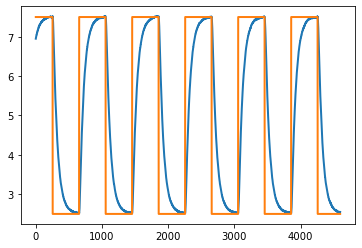

In [6]:
#CASO SIMULADO
#filename = 'C:\\Users\\VITOR\\Desktop\\ControleDigital\\Area3\\TRABALHO\\MATLAB\\DadosEnsaioSIMUL.txt'
#caso REAL 
filename = 'C:\\Users\\VITOR\\Desktop\\ControleDigital\\Area3\\TRABALHO\\python\\ma2575500.txt' # tem ruido e os caralho 
#CASO VRFT
#filename = 'C:\\Users\\VITOR\\Desktop\\ControleDigital\\Area3\\TRABALHO\\MATLAB\\DADOSIDENTIFICAR.txt'
dados = np.loadtxt(filename, delimiter=',', skiprows=405)

# Vetores de entrada e de saída
u, y = dados[:,1], dados[:,2]
na, nb, nk = 3, 2, 1 # colar  na = 3 para identificar a planta 
t = np.linspace(1,len(y),len(y)) # Vetor de tempo
pl.plot(t, y, linewidth=2)
pl.plot(t, u, linewidth=2)
# Identificação do modelo
m = pysid.identification.arx(na, nb, nk, u, y)

print(m.gen_model_string())

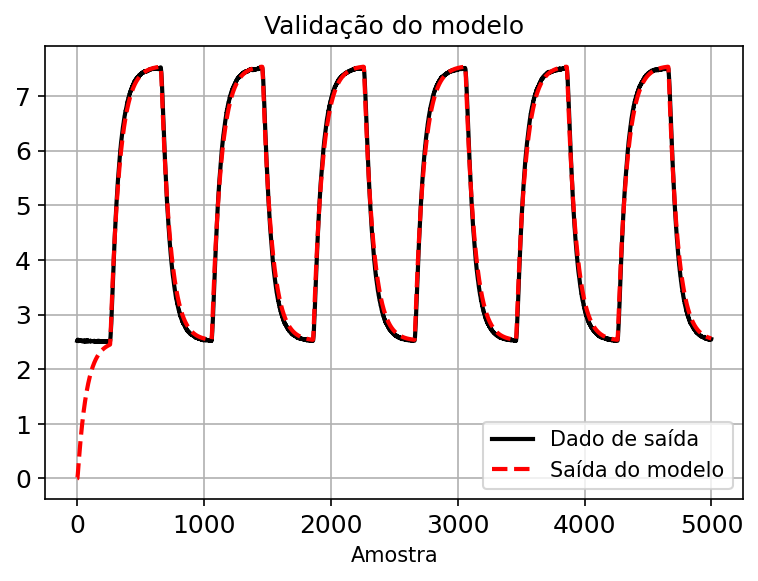

In [5]:
# Cálculo da saída do modelo
# Note o uso de [0,0] para compatibilizar as variáveis de m com o lfilter
y_hat = sig.lfilter(m.B[0,0], m.A[0,0], u)

# Visualização dos dados gerados utilizando o matplotlib.pylab
pl.figure(num=1, dpi=150, facecolor='w', edgecolor='k')

pl.plot(t, y, linewidth=2, color='k')
pl.plot(t, y_hat, linewidth=2, linestyle='dashed', color='r')

pl.title("Validação do modelo")
pl.xlabel("Amostra")
pl.legend(["Dado de saída", "Saída do modelo"])

pl.xticks(fontsize=12)
pl.yticks(fontsize=12)

pl.grid()
pl.show()